In [9]:
import pandas as pd
import sqlite3

In [10]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [11]:
sql_query = '''SELECT timestamp as datetime
               FROM checker
               WHERE uid LIKE "user_%"'''

commits_datetimes = pd.read_sql(sql_query, connect, parse_dates=['datetime'])
commits_datetimes

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [12]:
commits_datetimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


In [13]:
commits_datetimes['daytime'] = pd.cut(commits_datetimes['datetime'].dt.hour,
                                         bins=[-1, 4, 10, 17, 24],
                                         labels=['night', 'morning', 'afternoon', 'evening']
                                        )
commits_datetimes

,datetime,daytime
0,2020-04-17 05:19:02.744528,morning
1,2020-04-17 05:22:35.249331,morning
2,2020-04-17 05:22:45.549397,morning
3,2020-04-17 05:34:14.691200,morning
4,2020-04-17 05:34:24.422370,morning
...,...,...
3202,2020-05-21 20:19:06.872761,evening
3203,2020-05-21 20:22:41.785725,evening
3204,2020-05-21 20:22:41.877806,evening
3205,2020-05-21 20:37:00.129678,evening


In [14]:
daytime_counts_per_day = commits_datetimes.groupby(by=[commits_datetimes['datetime'].dt.date, commits_datetimes['daytime']]).count()
daytime_counts_per_day.rename(columns={'datetime': 'count'}, inplace=True)
daytime_counts_per_day = daytime_counts_per_day.unstack().droplevel(0, axis='columns')
daytime_counts_per_day

daytime,night,morning,afternoon,evening
datetime,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,2,12,2
2020-04-25,1,21,48,34


<AxesSubplot: title={'center': 'Commits per day'}, xlabel='datetime'>

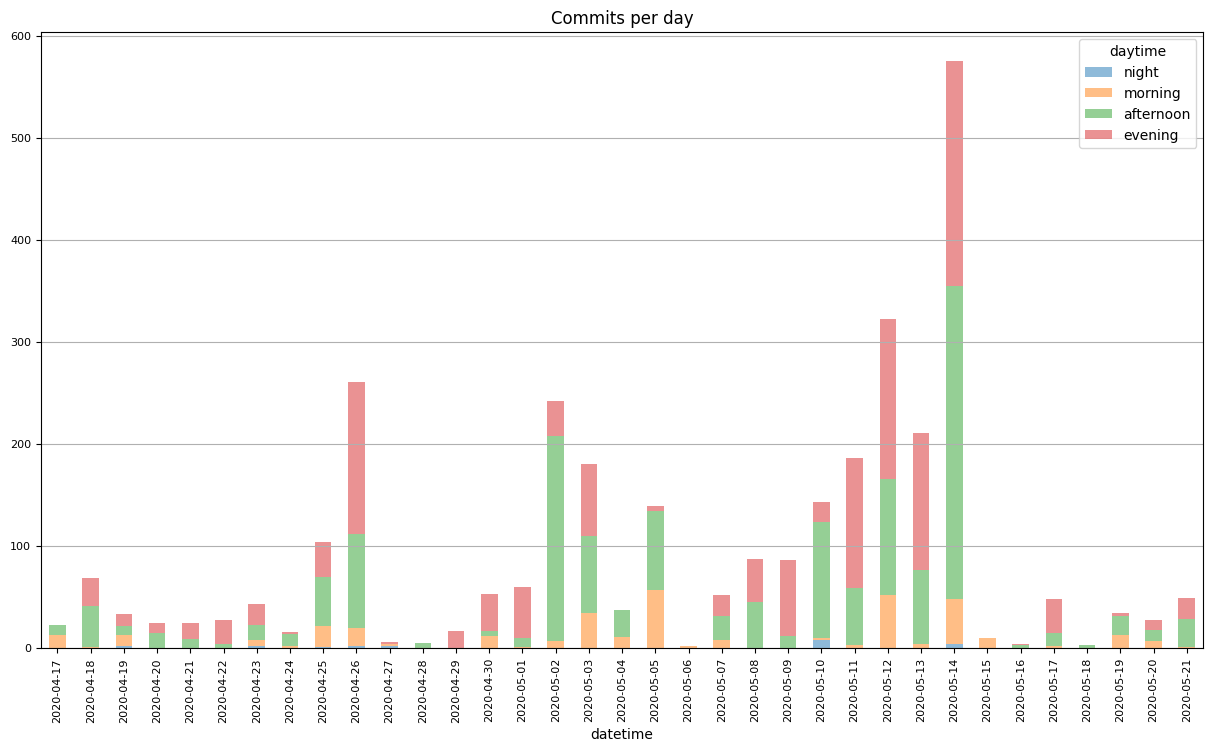

In [15]:
plt = daytime_counts_per_day.plot.bar(figsize=(15, 8),
                                      fontsize=8,
                                      title='Commits per day',
                                      rot=90,
                                      alpha=0.5,
                                      stacked=True
                                     )
plt.grid(axis='y')
plt

<h2>Which day has:<h2><br>
∗ the most number of commits<br>
∗ and at the same time, the number of commits in the evening is higher
than in the afternoon?<br>
Answer: 2020-05-12

In [16]:
connect.close()